In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Tensorflow CUDA warnings will not be shown here
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print("TensorFlow version is:", tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

print("Modules loaded")
print("----->  Let's go  :)")

TensorFlow version is: 2.15.0
Modules loaded
----->  Let's go  :)


In [ ]:
# Train dataset
train_path="/content/drive/MyDrive/train/"
image_pathes=[]
labels=[]

files=os.listdir(train_path)
for file in files:
    file_path=os.path.join(train_path,file)
    images=os.listdir(file_path)
    for image in images:
        image_path=os.path.join(file_path,image)
        image_pathes.append(image_path)
        labels.append(file)

fseries=pd.Series(image_pathes, name="image_pathes")
lseries=pd.Series(labels,name="labels")
train_df=pd.concat([fseries,lseries],axis=1)
# Test dataset
test_path="/content/drive/MyDrive/test/"
image_pathes=[]
labels=[]
files=os.listdir(test_path)
for file in files:
    file_bath=os.path.join(test_path,file)
    images=os.listdir(file_bath)
    for image in images:
        image_bath=os.path.join(file_bath , image)
        image_pathes.append(image_bath)
        labels.append(file)

Fseries =pd.Series(image_pathes,name="image_pathes")
lseries=pd.Series(labels,name="labels")

test_df=pd.concat([Fseries,lseries],axis=1)
#validaion datset
val_path="/content/drive/MyDrive/test/"
image_pathes=[]
labels=[]

files=os.listdir(val_path)
for file in files:
    file_path=os.path.join(train_path,file)
    images=os.listdir(file_path)
    for image in images:
        image_path=os.path.join(file_path,image)
        image_pathes.append(image_path)
        labels.append(file)

fseries=pd.Series(image_pathes, name="image_pathes")
lseries=pd.Series(labels,name="labels")
valid_df=pd.concat([fseries,lseries],axis=1)

In [ ]:
train_path = "/content/drive/MyDrive/train/"
test_path = "/content/drive/MyDrive/test/"
val_path = "/content/drive/MyDrive/test/"

In [ ]:
# Define ----> ImageDataGenerator
datagen = ImageDataGenerator()

# Define batch size and image size
batch_size = 32
image_size = (150, 150)

# Function ---> data generators from DataFrame
def create_datagen(df, directory):
    return datagen.flow_from_dataframe(
        dataframe=df,
        directory=directory,
        x_col="image_pathes",
        y_col="labels",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb",
        shuffle=True
    )

# data generators for training, testing, and validation datasets
train_generator = create_datagen(train_df, train_path)
test_generator = create_datagen(test_df, test_path)
valid_generator = create_datagen(valid_df, val_path)


Found 3590 validated image filenames belonging to 3 classes.
Found 317 validated image filenames belonging to 3 classes.
Found 3590 validated image filenames belonging to 3 classes.


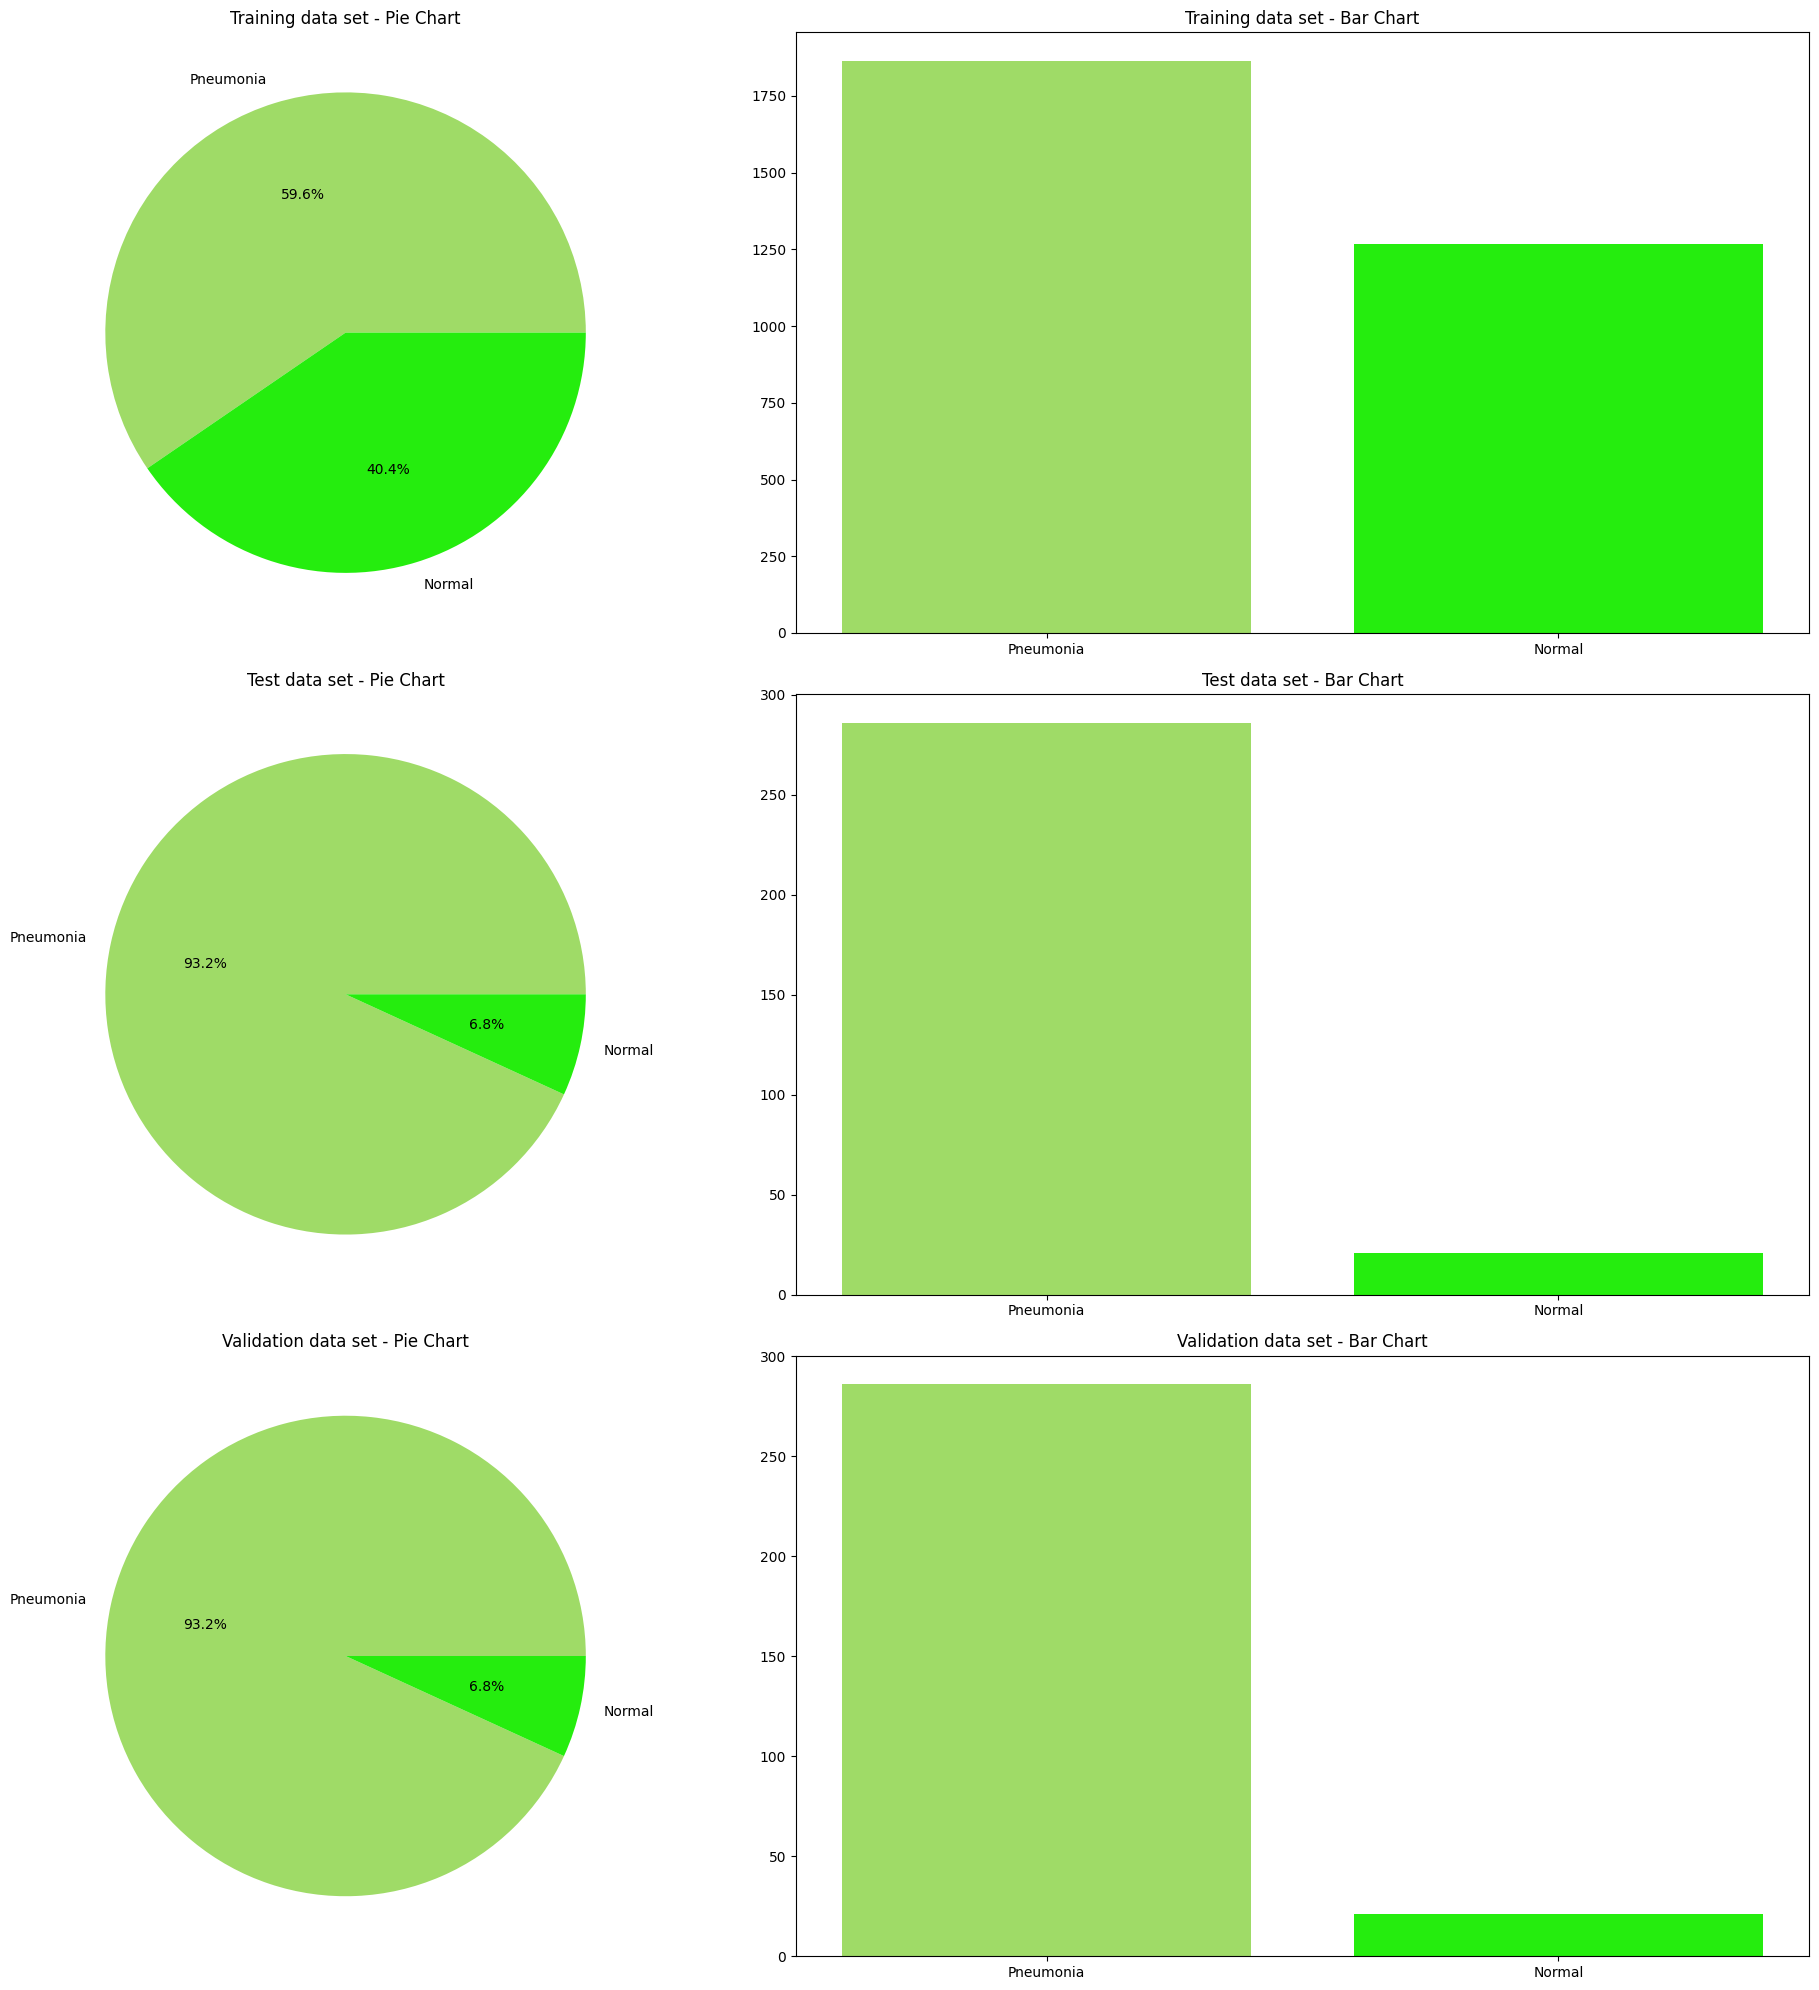

In [ ]:
train_folder = '/content/drive/MyDrive/train'
test_folder = '/content/drive/MyDrive/test'
val_folder = '/content/drive/MyDrive/test'

#  number of images in each class for each dataset
train_pneumonia_count = len(os.listdir(train_folder + "/PNEUMONIA"))
train_normal_count = len(os.listdir(train_folder + "/NORMAL"))

test_pneumonia_count = len(os.listdir(test_folder + "/PNEUMONIA"))
test_normal_count = len(os.listdir(test_folder + "/NORMAL"))

val_pneumonia_count = len(os.listdir(val_folder + "/PNEUMONIA"))
val_normal_count = len(os.listdir(val_folder + "/NORMAL"))


train_data = [train_pneumonia_count, train_normal_count]
test_data = [test_pneumonia_count, test_normal_count]
val_data = [val_pneumonia_count, val_normal_count]

# Labels
labels = ['Pneumonia', 'Normal']

#  subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

#  pie charts
colors_pie = ['#9fdb67', '#25ed0e']
colors_bar = ['#9fdb67', '#25ed0e']

axes[0, 0].pie(train_data, labels=labels, autopct='%1.1f%%', colors=colors_pie)
axes[0, 0].set_title('Training data set - Pie Chart')

axes[0, 1].bar(labels, train_data, color=colors_bar)
axes[0, 1].set_title('Training data set - Bar Chart')

axes[1, 0].pie(test_data, labels=labels, autopct='%1.1f%%', colors=colors_pie)
axes[1, 0].set_title('Test data set - Pie Chart')

axes[1, 1].bar(labels, test_data, color=colors_bar)
axes[1, 1].set_title('Test data set - Bar Chart')

axes[2, 0].pie(val_data, labels=labels, autopct='%1.1f%%', colors=colors_pie)
axes[2, 0].set_title('Validation data set - Pie Chart')

axes[2, 1].bar(labels, val_data, color=colors_bar)
axes[2, 1].set_title('Validation data set - Bar Chart')

plt.tight_layout()
plt.show()

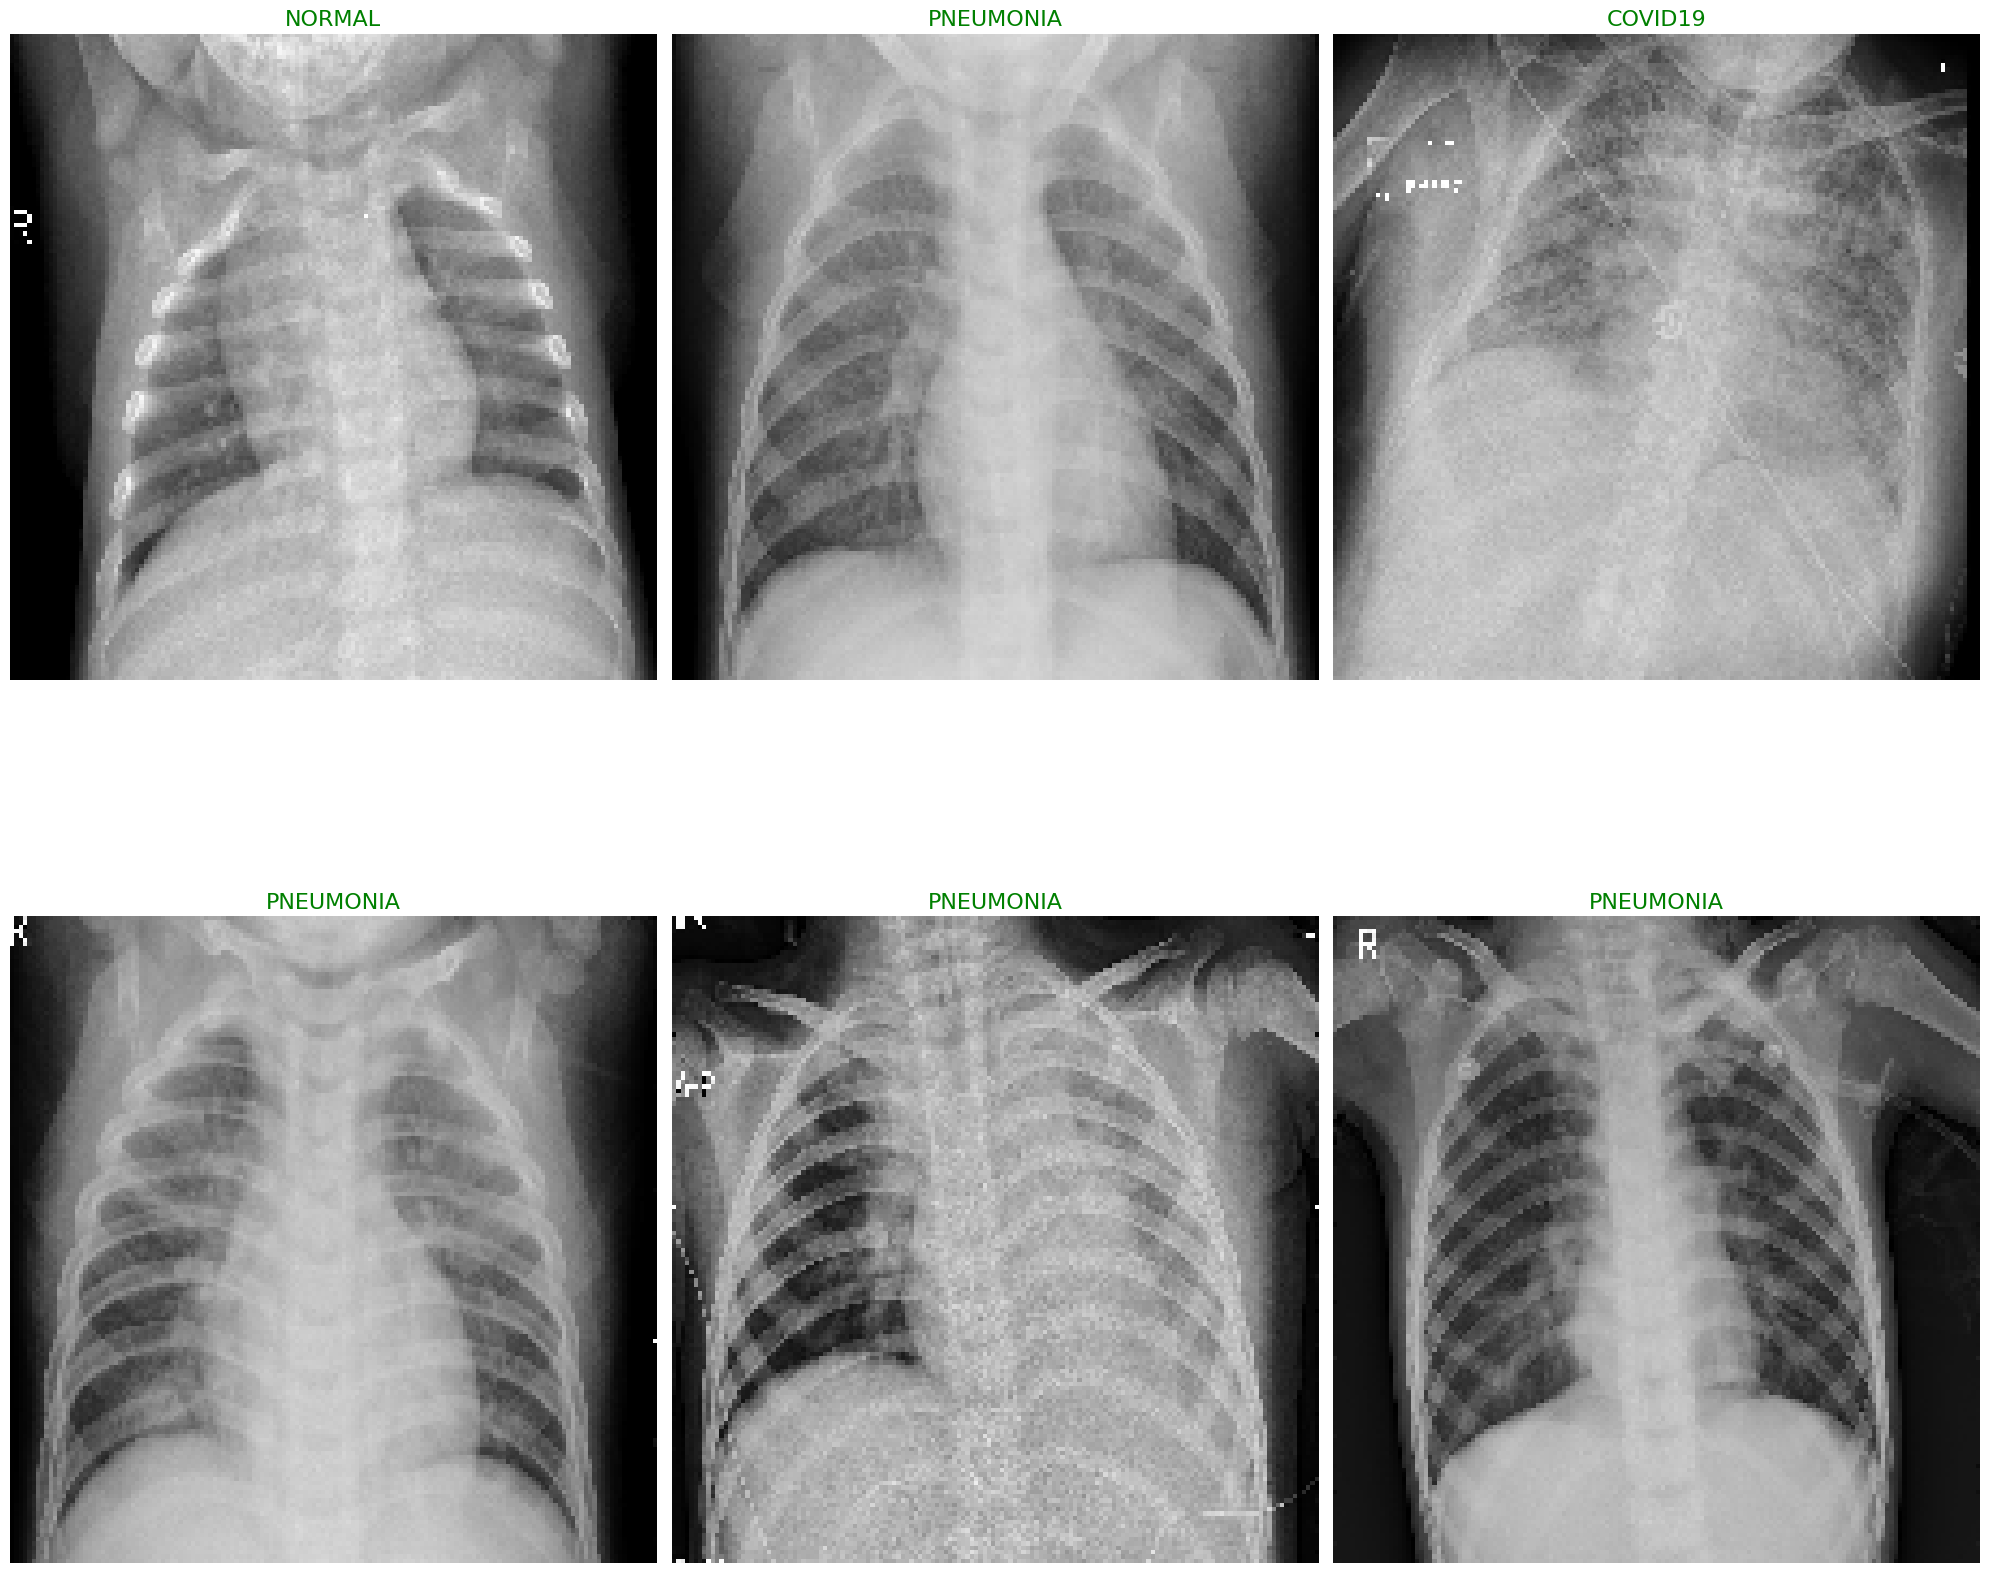

In [ ]:
# Traing images
train_dict = train_generator.class_indices

# Extracting class names ----> train_dict dictionary
classes = list(train_dict.keys())

# next batch ---> of images and labels from train_gen
images, labels = next(train_generator)

# Visualization----> parameters
num_images_to_display = 6
images_per_row = 3
num_rows = num_images_to_display // images_per_row

# P---> images
plt.figure(figsize=(20, 20))

for i in range(num_images_to_display):
    plt.subplot(num_rows, images_per_row, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='green', fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

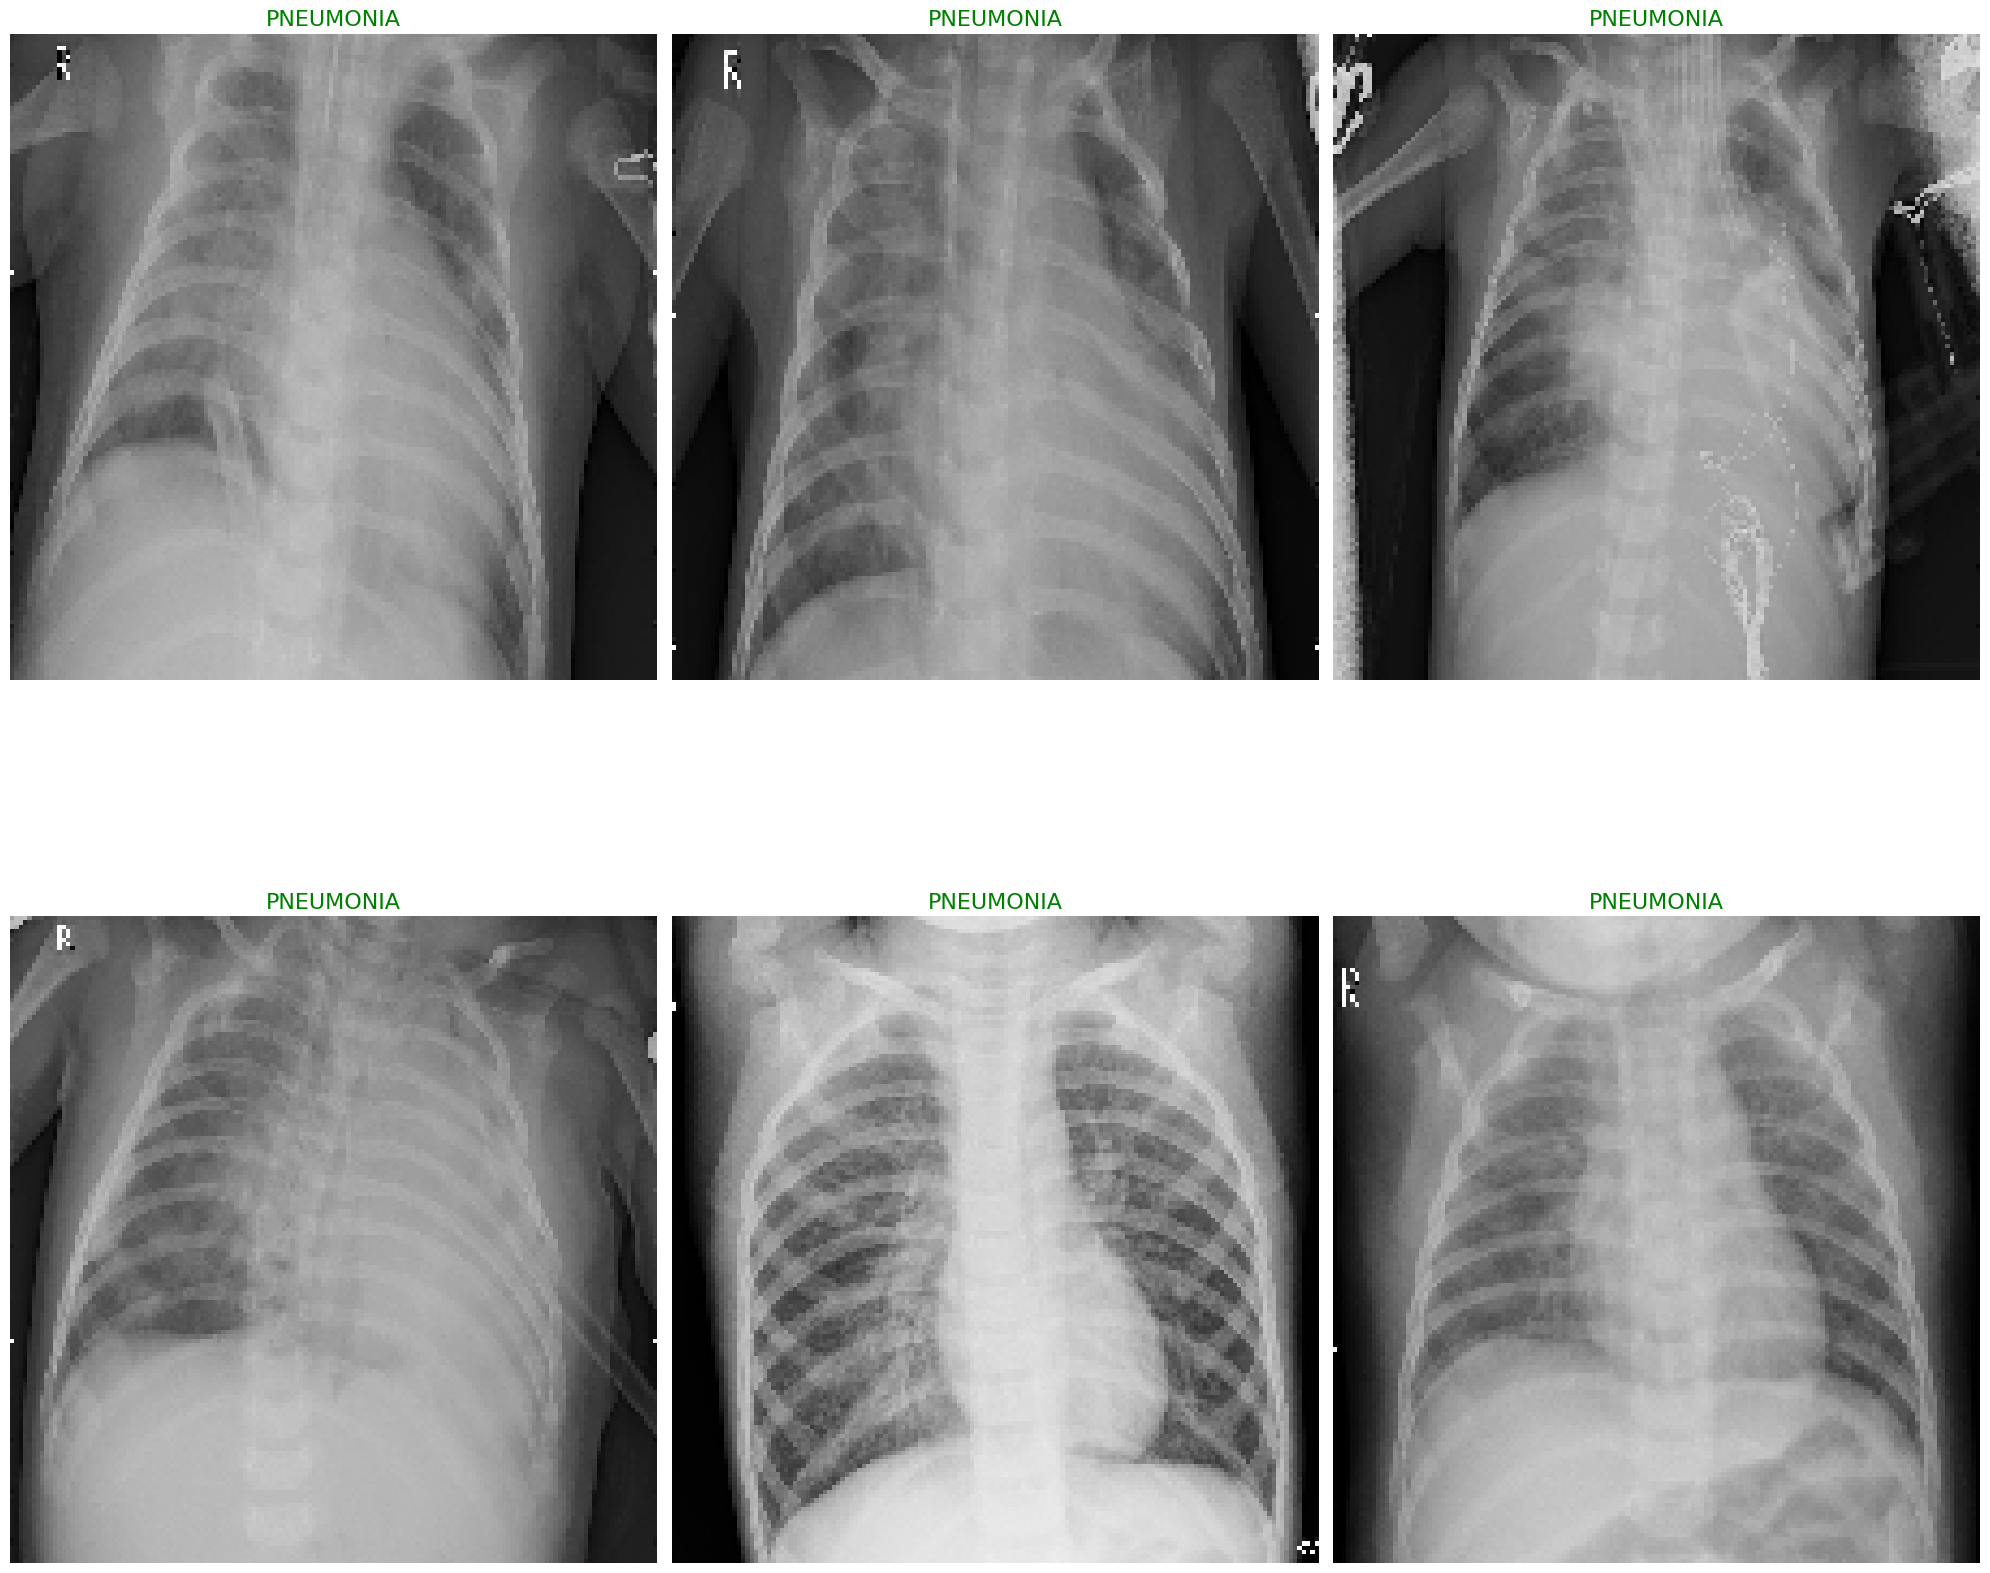

In [ ]:
# Testing images
test_dict = test_generator.class_indices

# Extracting class names ----> train_dict dictionary
classes = list(test_dict.keys())

# next batch ---> of images and labels from train_gen
images, labels = next(test_generator)

# Visualization----> parameters
num_images_to_display = 6
images_per_row = 3
num_rows = num_images_to_display // images_per_row

# P---> images
plt.figure(figsize=(20, 20))

for i in range(num_images_to_display):
    plt.subplot(num_rows, images_per_row, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='green', fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

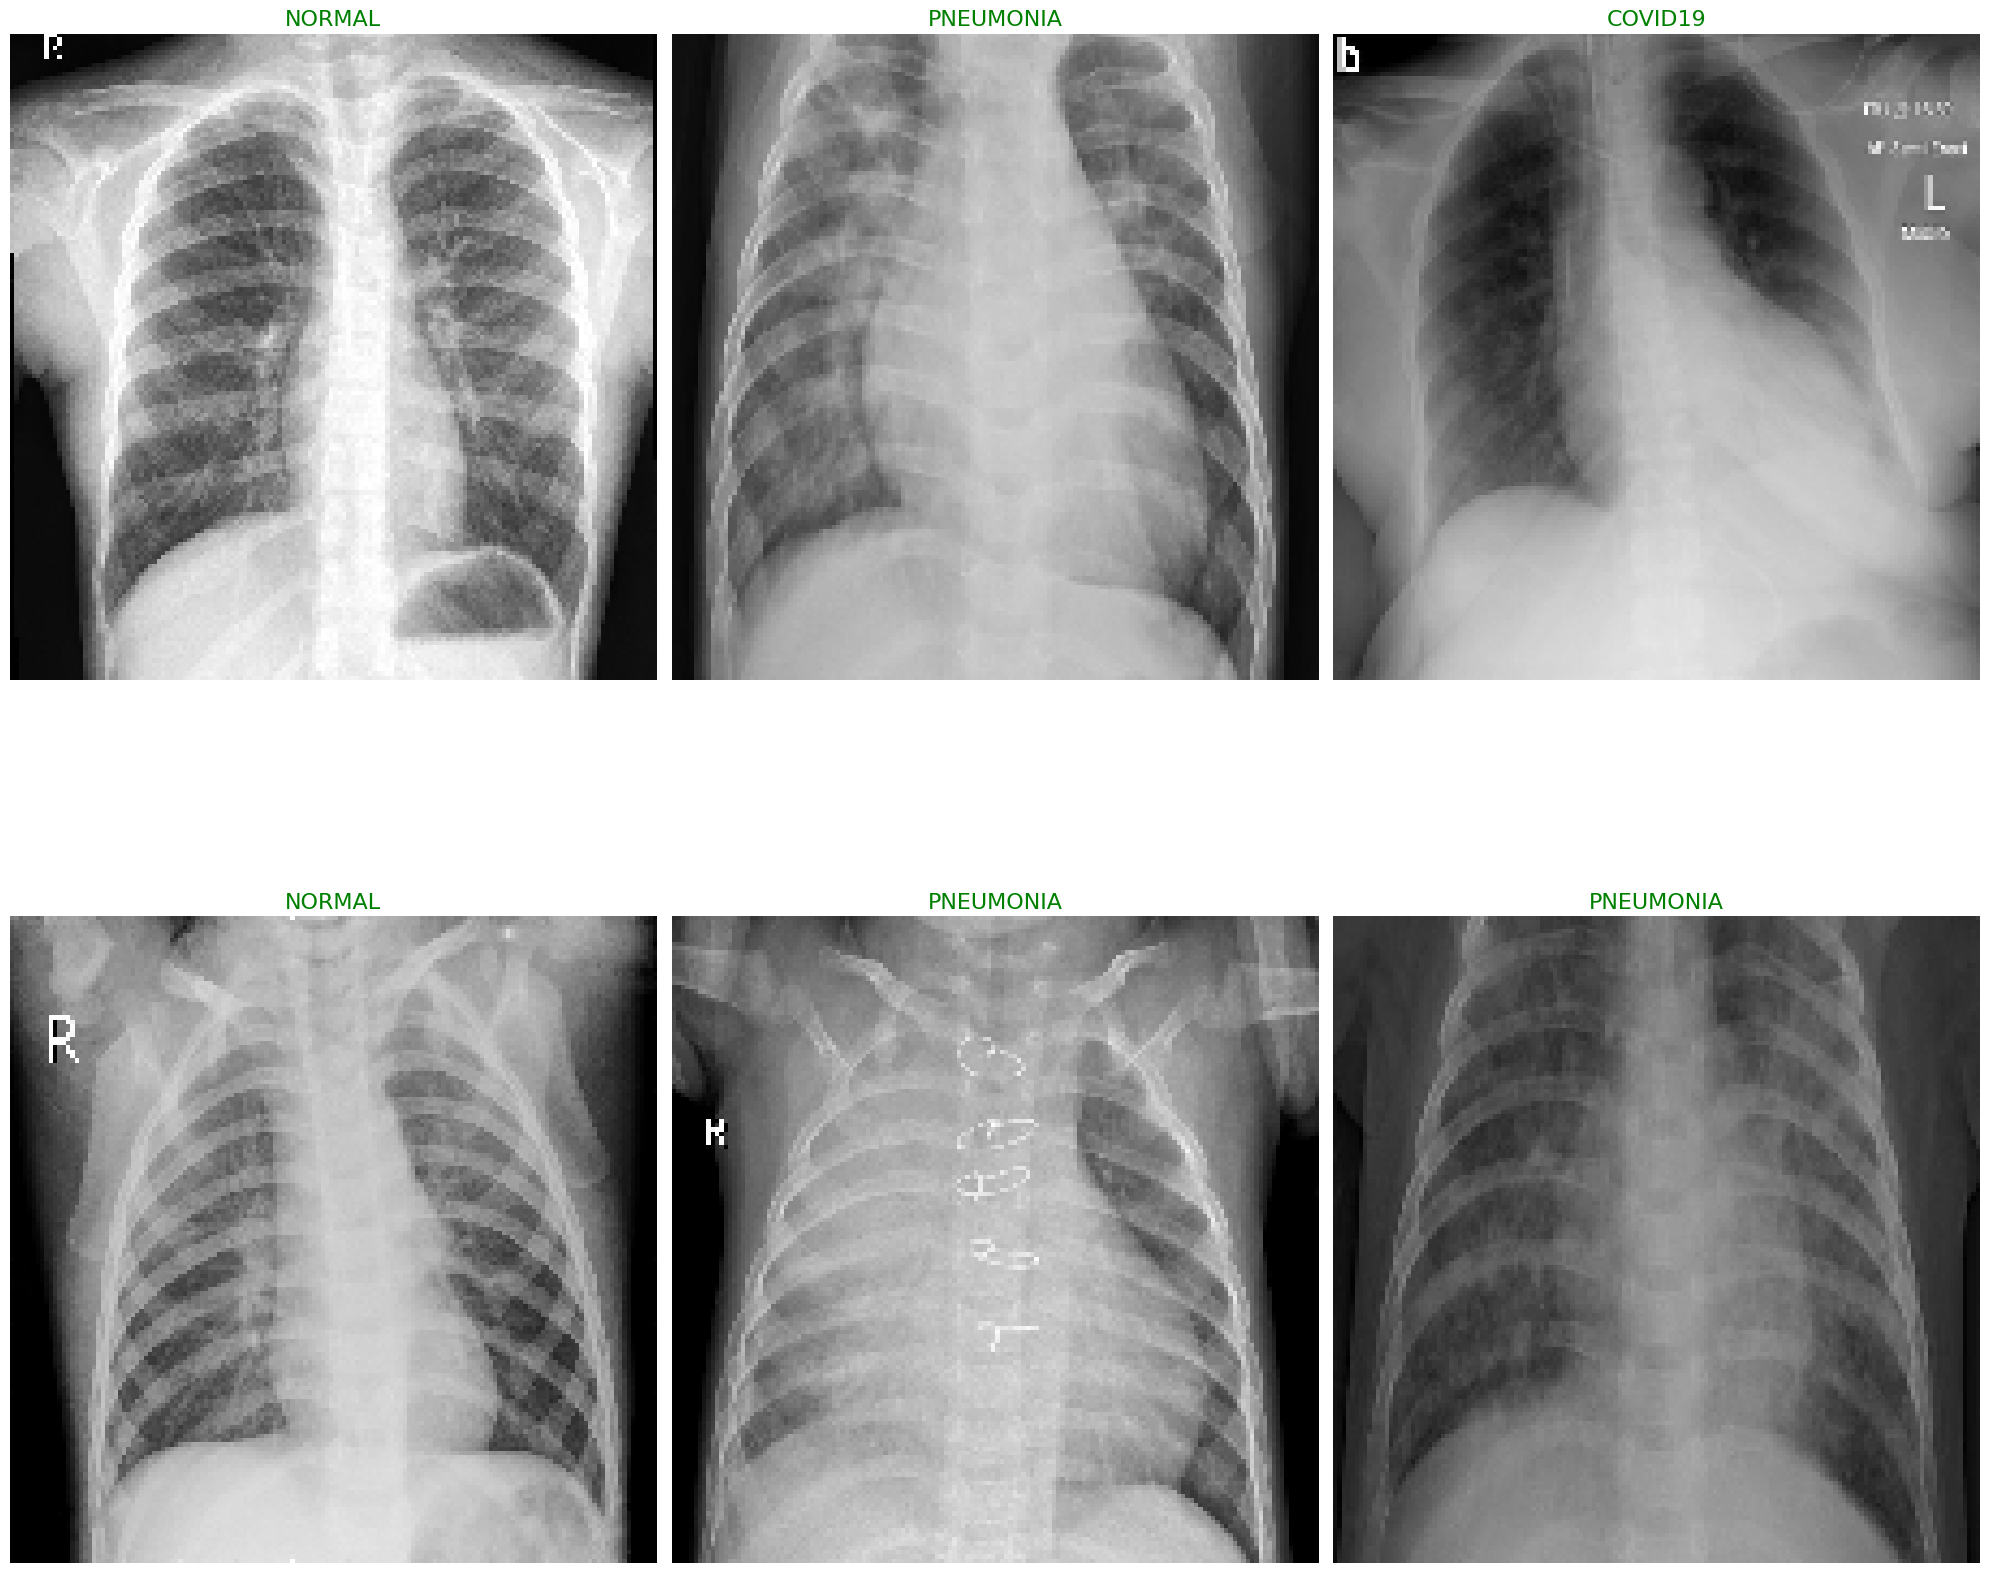

In [ ]:
# Vlidation images
valid_dict = valid_generator.class_indices

# Extracting class names ----> train_dict dictionary
classes = list(valid_dict.keys())

# next batch ---> of images and labels from train_gen
images, labels = next(valid_generator)

# Visualization----> parameters
num_images_to_display = 6
images_per_row = 3
num_rows = num_images_to_display // images_per_row

# P---> images
plt.figure(figsize=(20, 20))

for i in range(num_images_to_display):
    plt.subplot(num_rows, images_per_row, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='green', fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

***Any doubts: refer this***


> https://www.kaggle.com/code/muhammadibrahimqasmi/chest-xray-pneumonia-cnn-simple-solution



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Define paths
train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"
img_width, img_height = 224, 224
batch_size = 32

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 2873 images belonging to 3 classes.
Found 717 images belonging to 3 classes.
Found 317 images belonging to 3 classes.


In [ ]:
# Load the VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14978883 (57.14 MB)
Trainable params: 26419

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the model
model.save("covid_pneumonia_model.h5")


Epoch 1/10
90/90 [==============================] - 2069s 23s/step - loss: 0.6575 - accuracy: 0.7236 - val_loss: 0.5393 - val_accuracy: 0.7755
Epoch 2/10
90/90 [==============================] - 2070s 23s/step - loss: 0.4342 - accuracy: 0.8350 - val_loss: 0.4575 - val_accuracy: 0.8368
Epoch 3/10
90/90 [==============================] - 2019s 22s/step - loss: 0.3634 - accuracy: 0.8639 - val_loss: 0.4590 - val_accuracy: 0.8340
Epoch 4/10
90/90 [==============================] - 2019s 22s/step - loss: 0.3376 - accuracy: 0.8733 - val_loss: 0.4290 - val_accuracy: 0.8354
Epoch 5/10
90/90 [==============================] - 2013s 22s/step - loss: 0.3265 - accuracy: 0.8719 - val_loss: 0.3965 - val_accuracy: 0.8619
Epoch 6/10
90/90 [==============================] - 2047s 23s/step - loss: 0.2808 - accuracy: 0.8959 - val_loss: 0.4188 - val_accuracy: 0.8424
Epoch 7/10
90/90 [==============================] - 2019s 22s/step - loss: 0.2863 - accuracy: 0.8956 - val_loss: 0.4112 - val_accuracy: 0.8466

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 175s 17s/step - loss: 0.4182 - accuracy: 0.8233
Test Accuracy: 82.33%


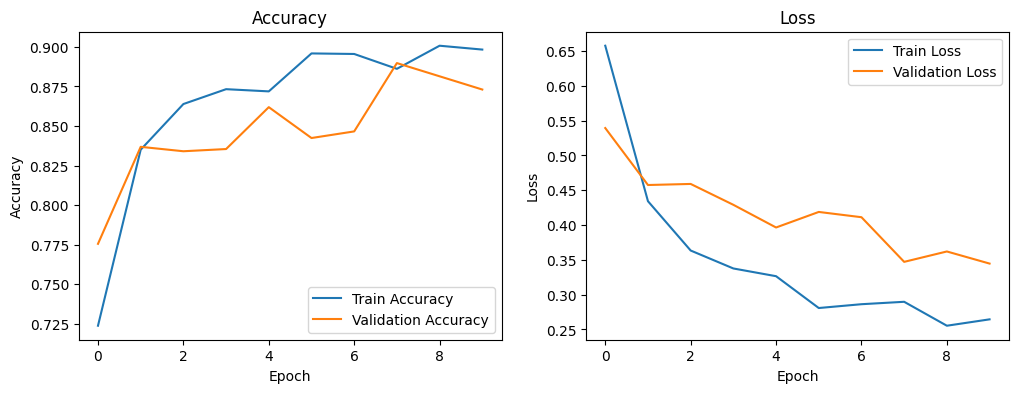

10/10 [==============================] - 172s 17s/step
              precision    recall  f1-score   support

     COVID19       0.82      0.90      0.86        10
      NORMAL       0.28      1.00      0.44        21
   PNEUMONIA       1.00      0.81      0.89       286

    accuracy                           0.82       317
   macro avg       0.70      0.90      0.73       317
weighted avg       0.95      0.82      0.86       317

[[  9   1   0]
 [  0  21   0]
 [  2  53 231]]


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

# Classification report and confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(y_true, y_pred_classes)
print(cm)
